Random Forest Accuracy on Test Set: 65.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.77      0.76      0.76       161
           2       0.57      0.65      0.61       140
           3       0.65      0.64      0.64       131
           4       0.60      0.51      0.55       150
           5       0.57      0.71      0.63       118
           6       0.67      0.64      0.65       151
           7       0.58      0.62      0.60       140
           8       0.68      0.64      0.66       153
           9       0.67      0.66      0.67       160
          10       0.62      0.60      0.61       151
          11       0.73      0.64      0.68       148

    accuracy                           0.66      1754
   macro avg       0.66      0.66      0.66      1754
weighted avg       0.66      0.66      0.66      1754



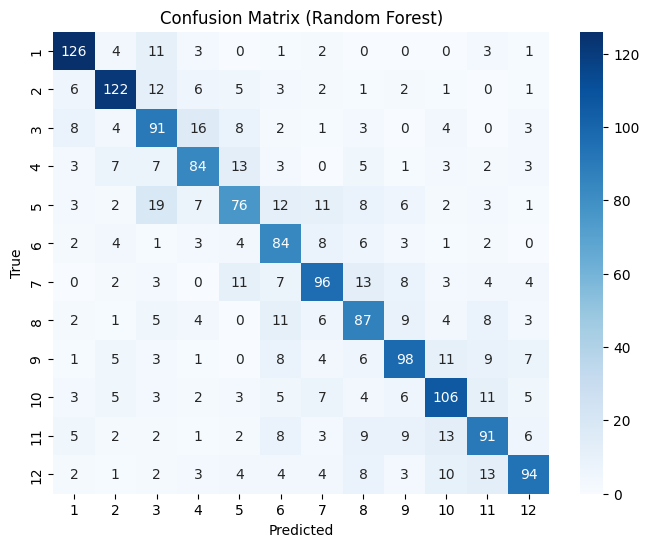


Cross-validation and Model Performance Summary:
           Model  Test Set Accuracy
0  Random Forest          65.849487


In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('scaled_hand_angles.csv')  # Change filename accordingly

# Step 2: Data Preprocessing
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Encode categorical target labels
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# Separate features and labels
features = df.drop(columns=['target'])
labels = df['target']

# Step 3: Feature Selection (Using Random Forest Feature Importance)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(features, labels)
feature_importances = pd.Series(rfc.feature_importances_, index=features.columns)
important_features = feature_importances[feature_importances > 0.01].index  # Keep important features
features = features[important_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 4: Model Training
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Model Evaluation
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy on Test Set: {rf_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Summary Table
cv_summary = {
    'Model': ['Random Forest'],
    'Test Set Accuracy': [rf_accuracy * 100],
}
cv_summary_df = pd.DataFrame(cv_summary)
print("\nCross-validation and Model Performance Summary:")
print(cv_summary_df)

Improved Accuracy: 66.08%

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.83      0.81       151
           2       0.75      0.75      0.75       161
           3       0.57      0.65      0.60       140
           4       0.63      0.62      0.63       131
           5       0.59      0.53      0.56       150
           6       0.58      0.75      0.65       118
           7       0.64      0.63      0.64       151
           8       0.61      0.59      0.60       140
           9       0.69      0.69      0.69       153
          10       0.66      0.68      0.67       160
          11       0.66      0.59      0.62       151
          12       0.76      0.64      0.70       148

    accuracy                           0.66      1754
   macro avg       0.66      0.66      0.66      1754
weighted avg       0.66      0.66      0.66      1754



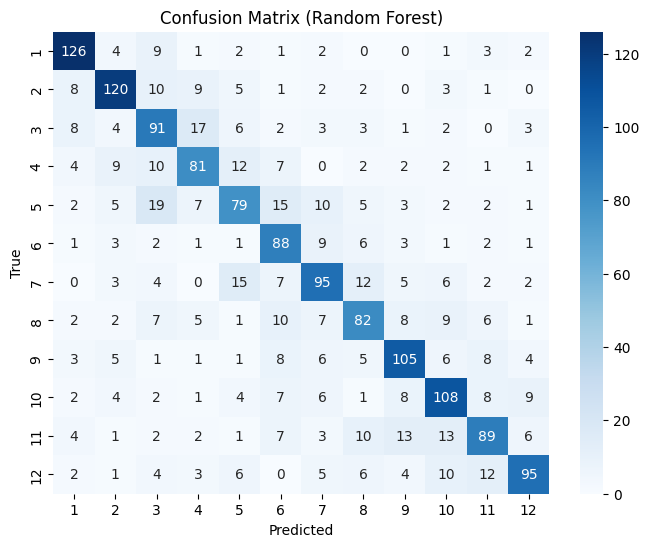

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "scaled_hand_angles.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Separate features and labels
X = df.drop(columns=['target'])
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select the top 12 features
top_features = feature_importances.nlargest(12).index
X_top = X[top_features]

# Split again with selected features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train a new Random Forest model
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train_top, y_train)

# Evaluate accuracy
rf_top_accuracy = rf_top.score(X_test_top, y_test)
print(f"Improved Accuracy: {rf_top_accuracy * 100:.2f}%")

# Predictions
y_pred = rf_top.predict(X_test_top)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


Cross-validation accuracy scores: [0.64005702 0.64504633 0.63195435 0.62624822 0.63552068]
Mean Cross-validation Accuracy: 63.58%
Random Forest Accuracy on Test Set: 65.28%

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.83      0.81       151
           2       0.76      0.76      0.76       161
           3       0.57      0.64      0.60       140
           4       0.63      0.63      0.63       131
           5       0.58      0.49      0.53       150
           6       0.57      0.69      0.63       118
           7       0.65      0.62      0.63       151
           8       0.58      0.63      0.60       140
           9       0.65      0.64      0.65       153
          10       0.67      0.66      0.66       160
          11       0.62      0.60      0.61       151
          12       0.74      0.63      0.68       148

    accuracy                           0.65      1754
   macro avg       0.65      0.65      0.65  

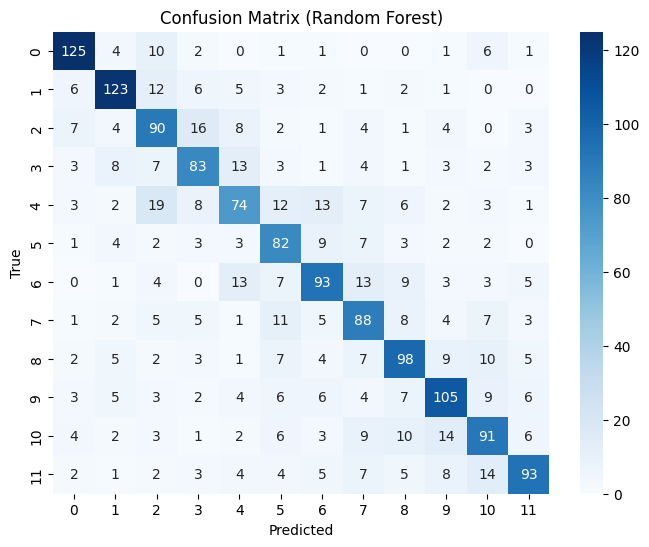

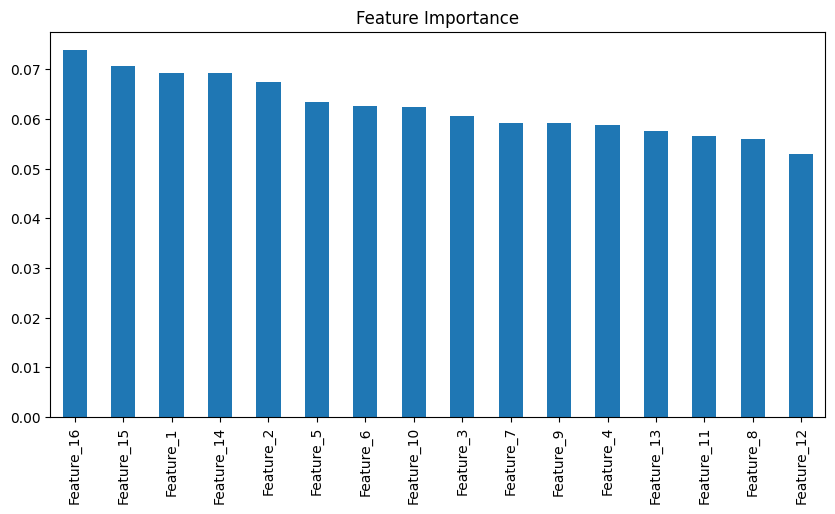

Optimized Random Forest Accuracy: 65.79%


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "scaled_hand_angles.csv"  # Ensure correct path
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['target'])  # Adjust if target column name is different
y = data['target']

# Scale features for better learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 1: Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)  # Less depth for better generalization
rf.fit(X_train, y_train)

# Cross-validation (5-fold) to evaluate model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Predictions on test set
rf_predictions = rf.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy on Test Set: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# ✅ Step 2: Feature Importance Analysis
feature_importances = pd.Series(rf.feature_importances_, index=data.drop(columns=['target']).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.show()

# ✅ Step 3: Keep Only the Most Important Features & Retrain
top_features = feature_importances.nlargest(15).index
X_top = data[top_features]  # Keeping only top features

# Split again using top features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train again using only important features
rf_top = RandomForestClassifier(n_estimators=500, random_state=42)
rf_top.fit(X_train_top, y_train)

# Predict again with optimized features
rf_top_predictions = rf_top.predict(X_test_top)

# Evaluate again
rf_top_accuracy = accuracy_score(y_test, rf_top_predictions)
print(f"Optimized Random Forest Accuracy: {rf_top_accuracy * 100:.2f}%")


C:\Users\Asjat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Asjat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

Optimized Random Forest Accuracy: 65.19%

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.70      0.80      0.74       157
           2       0.75      0.72      0.74       166
           3       0.67      0.69      0.68       160
           4       0.72      0.63      0.67       148
           5       0.59      0.58      0.58       156
           6       0.64      0.70      0.67       167
           7       0.70      0.56      0.62       165
           8       0.57      0.61      0.59       154
           9       0.68      0.65      0.66       150
          10       0.55      0.62      0.58       156
          11       0.64      0.59      0.61       154
          12       0.65      0.67      0.66       163

    accuracy                           0.65      1896
   macro avg       0.65      0.65      0.65      1896
weighted avg       0.65      0.65      0.65      1896



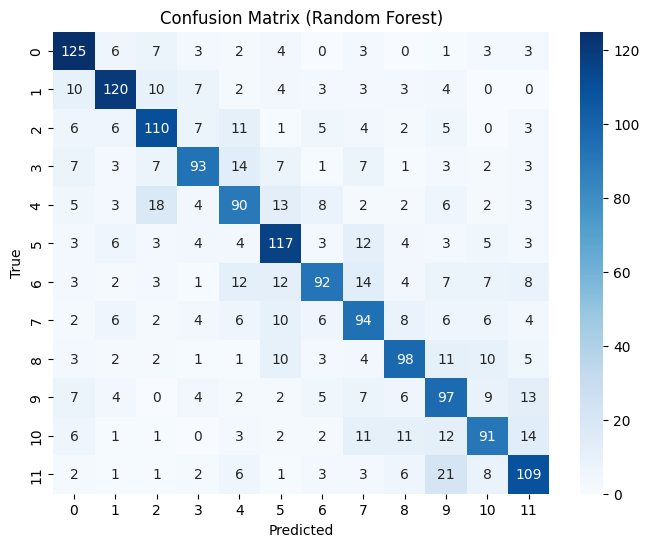

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11], got [ 1  2  3  4  5  6  7  8  9 10 11 12]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load dataset
file_path = "scaled_hand_angles.csv"
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['target'])
y = data['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 1: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset again after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Step 2: Hyperparameter Tuning with Randomized Search
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Best RF model
best_rf = rf_search.best_estimator_
rf_predictions = best_rf.predict(X_test)

# ✅ Step 3: Evaluate Optimized Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Optimized Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix for RF
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# ✅ Step 4: Try XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, xgb_predictions))

# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


Random Forest Accuracy with SMOTE: 67.25%

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.80      0.77       157
           2       0.78      0.73      0.75       166
           3       0.64      0.68      0.66       160
           4       0.69      0.69      0.69       148
           5       0.61      0.60      0.61       156
           6       0.67      0.73      0.70       167
           7       0.73      0.61      0.67       165
           8       0.60      0.62      0.61       154
           9       0.69      0.68      0.69       150
          10       0.59      0.62      0.61       156
          11       0.63      0.58      0.61       154
          12       0.70      0.71      0.71       163

    accuracy                           0.67      1896
   macro avg       0.67      0.67      0.67      1896
weighted avg       0.67      0.67      0.67      1896



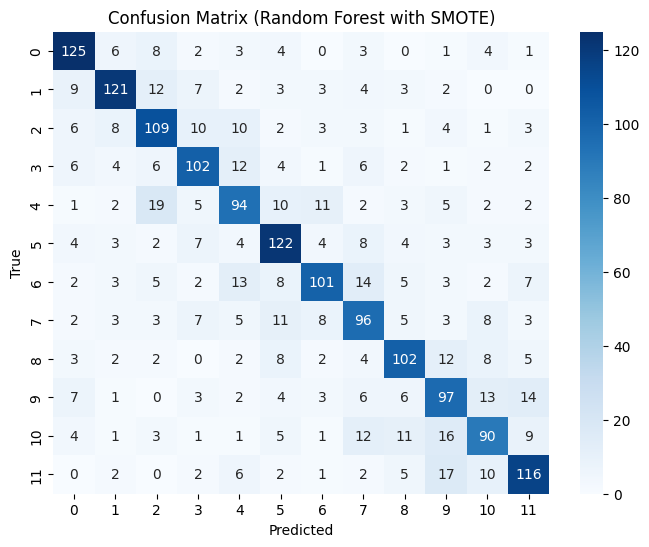

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "scaled_hand_angles.csv"
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['target'])
y = data['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 1: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset again after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy with SMOTE: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.show()



In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

# Load dataset
file_path = "/mnt/data/scaled_hand_angles.csv"
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['target'])
y = data['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 1: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset again after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Step 2: Train LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print(f"LightGBM Accuracy with SMOTE: {lgb_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, lgb_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (LightGBM with SMOTE)')
plt.show()


ModuleNotFoundError: No module named 'lightgbm'